<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Base%20tesis%20bien%20Jenny%20semaforos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install pandas openpyxl linearmodels


In [ ]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")

# Renombrar columnas
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']

# Eliminar filas con encabezados repetidos
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas a valores numéricos
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)


In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]  # número total de observaciones
k = X.shape[1]  # número de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen y el RMSE
print(results.summary)
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")

# Obtener e imprimir los intervalos de confianza al 95 %
conf_int = results.conf_int()
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)

                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        18:09:04   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

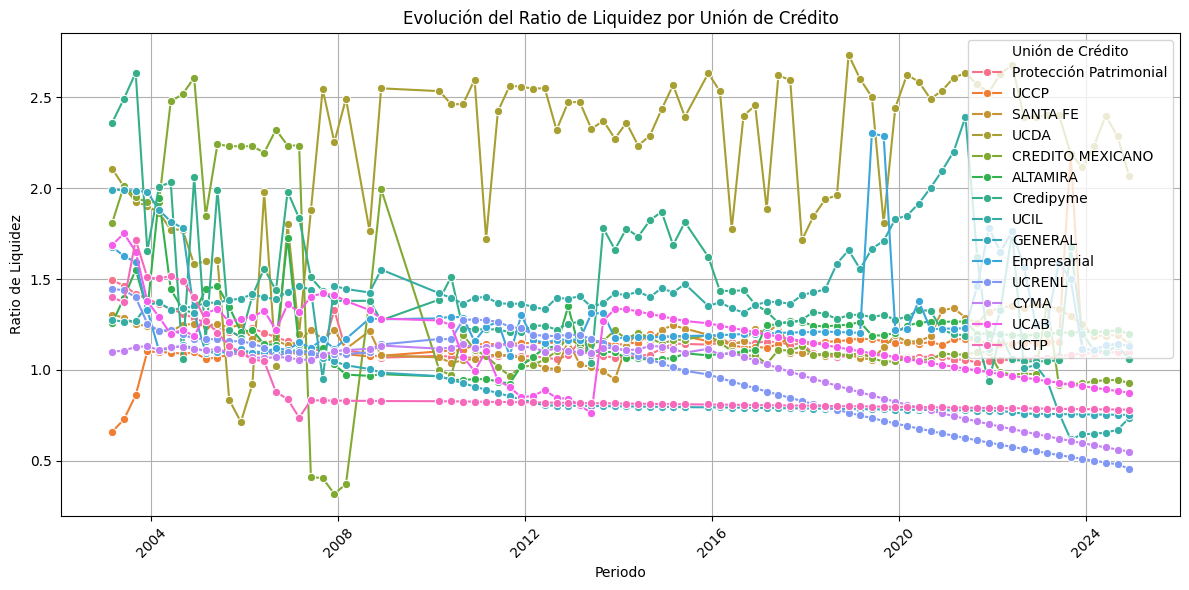

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir tipos de datos
df['PERIODO'] = pd.to_datetime(df['PERIODO'].astype(str), format='%Y%m')
df[['RATIO_LIQUIDEZ']] = df[['RATIO_LIQUIDEZ']].apply(pd.to_numeric)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='PERIODO', y='RATIO_LIQUIDEZ', hue='UNIONES', marker='o')

plt.title('Evolución del Ratio de Liquidez por Unión de Crédito')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.xticks(rotation=45)
plt.legend(title='Unión de Crédito')
plt.grid(True)
plt.tight_layout()
plt.show()


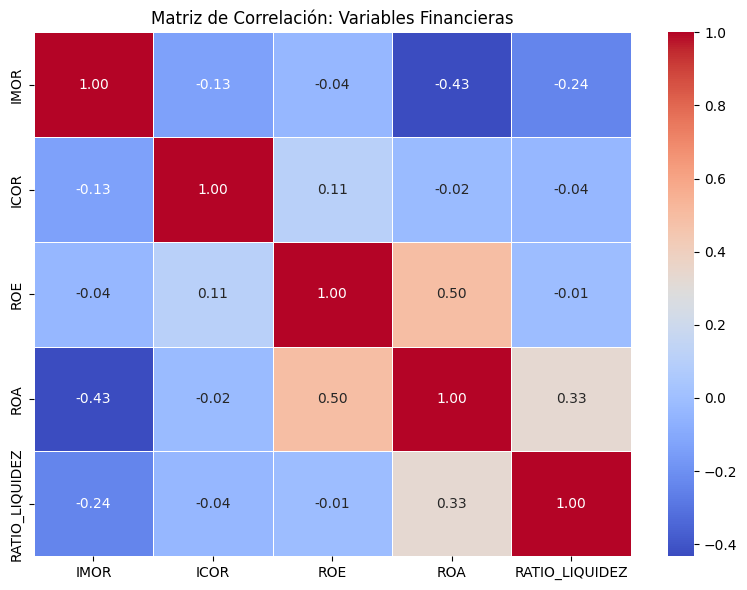

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas relevantes a numéricas
variables = ['IMOR', 'ICOR', 'ROE', 'ROA', 'RATIO_LIQUIDEZ']
df[variables] = df[variables].apply(pd.to_numeric)

# Calcular matriz de correlación
correlation_matrix = df[variables].corr()

# Crear matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación: Variables Financieras')
plt.tight_layout()
plt.show()


Coeficientes del modelo:
const    1.385403
IMOR    -0.002821
ICOR    -0.001994
ROE     -0.002660
ROA      0.017689
Name: parameter, dtype: float64
Resultados del summary: 
                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        18:09:25   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:          

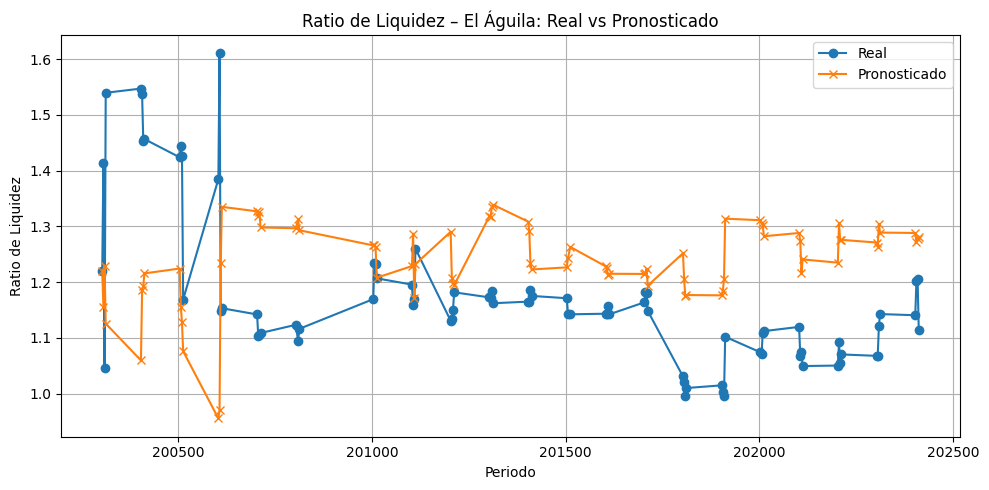


Archivo exportado como 'Pronostico_El_Aguila.xlsx'


In [ ]:
# Instalación de librerías necesarias
!pip install linearmodels
!pip install pandas openpyxl

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ----------------------------
# 1. Ajustar modelo con PANEL BIEN
# ----------------------------

# Cargar y limpiar la base PANEL BIEN
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar datos de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()

# Obtener coeficientes
coeficientes = resultados.params
print("Coeficientes del modelo:")
print(coeficientes)

print("Resultados del summary: ")
print(resultados.summary)

# ----------------------------
# 2. Pronóstico de El Águila
# ----------------------------

# Leer archivo de El Águila
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar X con constante
X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])

# Pronosticar sin efecto fijo (ya que solo se usaron coeficientes)
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)

# Calcular error
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Calcular RMSE
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
print(f"\nRMSE del pronóstico de El Águila (sin efecto fijo): {rmse_aguila:.4f}")

# Calcular MAE (Error Promedio Absoluto)
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")


# Mostrar tabla de comparación
print("\nComparación real vs. pronóstico:")
print(df_aguila[['PERIODO', 'RATIO_LIQUIDEZ', 'PRONOSTICO', 'ERROR']])

# ----------------------------
# 3. Graficar resultado
# ----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_aguila['PERIODO'], df_aguila['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila['PERIODO'], df_aguila['PRONOSTICO'], marker='x', label='Pronosticado')
plt.title('Ratio de Liquidez – El Águila: Real vs Pronosticado')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Exportar a Excel
# ----------------------------
df_aguila.to_excel("Pronostico_El_Aguila.xlsx", index=False)
print("\nArchivo exportado como 'Pronostico_El_Aguila.xlsx'")


In [ ]:
# Calcular RMSE
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
print(f"\nRMSE del pronóstico de El Águila (sin efecto fijo): {rmse_aguila:.4f}")

# Calcular MAE (Error Promedio Absoluto)
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")



RMSE del pronóstico de El Águila (sin efecto fijo): 0.1948
MAE (Error Promedio Absoluto): 0.1615


In [ ]:
def forecast_panel(X_nuevo, coeficientes):
    return X_nuevo.dot(coeficientes)


In [ ]:
df_aguila['PRONOSTICO'] = forecast_panel(X_aguila, coeficientes)


Coeficientes del modelo:
const    1.385403
IMOR    -0.002821
ICOR    -0.001994
ROE     -0.002660
ROA      0.017689
Name: parameter, dtype: float64
Resultados del summary: 
                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        18:09:49   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:          

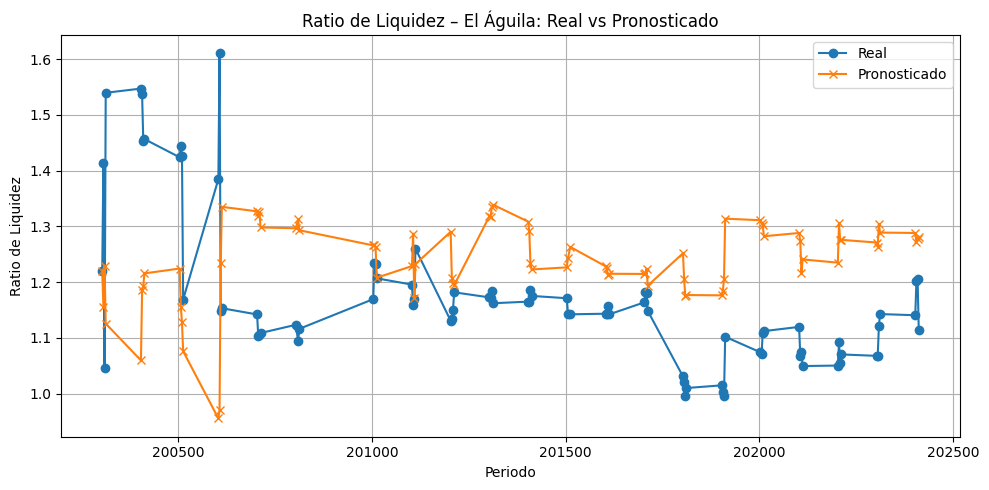


Archivo exportado como 'Pronostico_El_Aguila.xlsx'


In [ ]:
# Instalación de librerías necesarias
!pip install linearmodels
!pip install pandas openpyxl

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ----------------------------
# 1. Ajustar modelo con PANEL BIEN
# ----------------------------

# Cargar y limpiar la base PANEL BIEN
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar datos de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()

# Obtener coeficientes
coeficientes = resultados.params
print("Coeficientes del modelo:")
print(coeficientes)

print("Resultados del summary: ")
print(resultados.summary)

# ----------------------------
# 2. Función forecast
# ----------------------------

def forecast_panel(X_nuevo, coeficientes):
    """
    Realiza el pronóstico de RATIO_LIQUIDEZ utilizando los coeficientes del modelo.
    """
    return X_nuevo.dot(coeficientes)

# ----------------------------
# 3. Pronóstico de El Águila
# ----------------------------

# Leer archivo de El Águila
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar X con constante
X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])

# Usar la función forecast
df_aguila['PRONOSTICO'] = forecast_panel(X_aguila, coeficientes)

# Calcular error
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Calcular métricas de error
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))

print(f"\nRMSE del pronóstico de El Águila (sin efecto fijo): {rmse_aguila:.4f}")
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")

# Mostrar tabla de comparación
print("\nComparación real vs. pronóstico:")
print(df_aguila[['PERIODO', 'RATIO_LIQUIDEZ', 'PRONOSTICO', 'ERROR']])

# ----------------------------
# 4. Graficar resultado
# ----------------------------

plt.figure(figsize=(10, 5))
plt.plot(df_aguila['PERIODO'], df_aguila['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila['PERIODO'], df_aguila['PRONOSTICO'], marker='x', label='Pronosticado')
plt.title('Ratio de Liquidez – El Águila: Real vs Pronosticado')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Exportar a Excel
# ----------------------------

df_aguila.to_excel("Pronostico_El_Aguila.xlsx", index=False)
print("\nArchivo exportado como 'Pronostico_El_Aguila.xlsx'")


In [ ]:
import pandas as pd

# Cargar archivo
archivo = "PANEL BIEN.xlsx"
df = pd.read_excel(archivo, sheet_name="Hoja1")

# Limpiar y renombrar columnas
df.columns = df.iloc[0]
df = df[1:]
df.columns.name = None
df = df.rename(columns={"Unión de Credito": "INDICADOR"})

# Convertir columnas numéricas
numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular cuartiles por indicador
cuartiles = df[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)

# Mostrar los cuartiles
print("📊 Cuartiles por indicador:")
print(cuartiles)

# Clasificador de semáforo general
def clasificar(valor, q1, q3):
    if valor < q1:
        return "🔴 Bajo"
    elif valor > q3:
        return "🟢 Alto"
    else:
        return "🟡 Medio"

# Calcular promedios por Unión
promedios = df.groupby("INDICADOR")[numeric_cols].mean().round(2)

# Evaluar cada indicador con cuartiles personalizados
print("\n📈 Evaluación por Unión de Crédito con Semáforo:")
for nombre, fila in promedios.iterrows():
    print(f"\n🔹 Unión de Crédito: {nombre}")
    for col in numeric_cols:
        estado = clasificar(fila[col], cuartiles.loc[0.25, col], cuartiles.loc[0.75, col])
        print(f"{col}: {fila[col]} → {estado}")


📊 Cuartiles por indicador:
      RATIO DE LIQUIDEZ   IMOR   ICOR   ROA    ROE
0.25               1.04   1.63  28.45 -0.80  -1.56
0.50               1.14   4.65  55.73  0.77   5.61
0.75               1.30  15.07  80.18  1.94  11.04

📈 Evaluación por Unión de Crédito con Semáforo:

🔹 Unión de Crédito: ALTAMIRA
RATIO DE LIQUIDEZ: 1.19 → 🟡 Medio
IMOR: 26.73 → 🟢 Alto
ICOR: 19.18 → 🔴 Bajo
ROA: 0.96 → 🟡 Medio
ROE: 5.3 → 🟡 Medio

🔹 Unión de Crédito: CREDITO MEXICANO
RATIO DE LIQUIDEZ: 1.28 → 🟡 Medio
IMOR: 15.05 → 🟡 Medio
ICOR: 26.96 → 🔴 Bajo
ROA: -0.09 → 🟡 Medio
ROE: 1.84 → 🟡 Medio

🔹 Unión de Crédito: CYMA
RATIO DE LIQUIDEZ: 0.97 → 🔴 Bajo
IMOR: 6.18 → 🟡 Medio
ICOR: 64.58 → 🟡 Medio
ROA: -0.04 → 🟡 Medio
ROE: -0.27 → 🟡 Medio

🔹 Unión de Crédito: Credipyme
RATIO DE LIQUIDEZ: 1.42 → 🟢 Alto
IMOR: 17.18 → 🟢 Alto
ICOR: 49.37 → 🟡 Medio
ROA: -1.65 → 🔴 Bajo
ROE: -2.99 → 🔴 Bajo

🔹 Unión de Crédito: Empresarial
RATIO DE LIQUIDEZ: 1.27 → 🟡 Medio
IMOR: 2.11 → 🟡 Medio
ICOR: 88.39 → 🟢 Alto
ROA: 1.9 → 🟡 Medio


In [ ]:
import pandas as pd

# Cargar archivo
archivo = "PANEL BIEN.xlsx"
df = pd.read_excel(archivo, sheet_name="Hoja1")

# Limpiar y renombrar columnas
df.columns = df.iloc[0]
df = df[1:]
df.columns.name = None
df = df.rename(columns={"Unión de Credito": "INDICADOR"})

# Convertir columnas numéricas
numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular cuartiles por indicador
cuartiles = df[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)

# Mostrar cuartiles
print("📊 Cuartiles por indicador:")
print(cuartiles)

# Indicadores donde un valor más alto es peor (riesgo)
indicadores_invertidos = ["IMOR", "ICOR"]

# Clasificador ajustado por tipo de indicador
def clasificar(valor, q1, q3, invertido=False):
    if invertido:
        if valor > q3:
            return "🔴 Alto"
        elif valor < q1:
            return "🟢 Bajo"
        else:
            return "🟡 Medio"
    else:
        if valor < q1:
            return "🔴 Bajo"
        elif valor > q3:
            return "🟢 Alto"
        else:
            return "🟡 Medio"

# Calcular promedios por Unión
promedios = df.groupby("INDICADOR")[numeric_cols].mean().round(2)

# Evaluar cada indicador con semáforo
print("\n📈 Evaluación por Unión de Crédito con Semáforo:")
for nombre, fila in promedios.iterrows():
    print(f"\n🔹 Unión de Crédito: {nombre}")
    for col in numeric_cols:
        invertido = col in indicadores_invertidos
        estado = clasificar(fila[col], cuartiles.loc[0.25, col], cuartiles.loc[0.75, col], invertido)
        print(f"{col}: {fila[col]} → {estado}")


📊 Cuartiles por indicador:
      RATIO DE LIQUIDEZ   IMOR   ICOR   ROA    ROE
0.25               1.04   1.63  28.45 -0.80  -1.56
0.50               1.14   4.65  55.73  0.77   5.61
0.75               1.30  15.07  80.18  1.94  11.04

📈 Evaluación por Unión de Crédito con Semáforo:

🔹 Unión de Crédito: ALTAMIRA
RATIO DE LIQUIDEZ: 1.19 → 🟡 Medio
IMOR: 26.73 → 🔴 Alto
ICOR: 19.18 → 🟢 Bajo
ROA: 0.96 → 🟡 Medio
ROE: 5.3 → 🟡 Medio

🔹 Unión de Crédito: CREDITO MEXICANO
RATIO DE LIQUIDEZ: 1.28 → 🟡 Medio
IMOR: 15.05 → 🟡 Medio
ICOR: 26.96 → 🟢 Bajo
ROA: -0.09 → 🟡 Medio
ROE: 1.84 → 🟡 Medio

🔹 Unión de Crédito: CYMA
RATIO DE LIQUIDEZ: 0.97 → 🔴 Bajo
IMOR: 6.18 → 🟡 Medio
ICOR: 64.58 → 🟡 Medio
ROA: -0.04 → 🟡 Medio
ROE: -0.27 → 🟡 Medio

🔹 Unión de Crédito: Credipyme
RATIO DE LIQUIDEZ: 1.42 → 🟢 Alto
IMOR: 17.18 → 🔴 Alto
ICOR: 49.37 → 🟡 Medio
ROA: -1.65 → 🔴 Bajo
ROE: -2.99 → 🔴 Bajo

🔹 Unión de Crédito: Empresarial
RATIO DE LIQUIDEZ: 1.27 → 🟡 Medio
IMOR: 2.11 → 🟡 Medio
ICOR: 88.39 → 🔴 Alto
ROA: 1.9 → 🟡 Medio


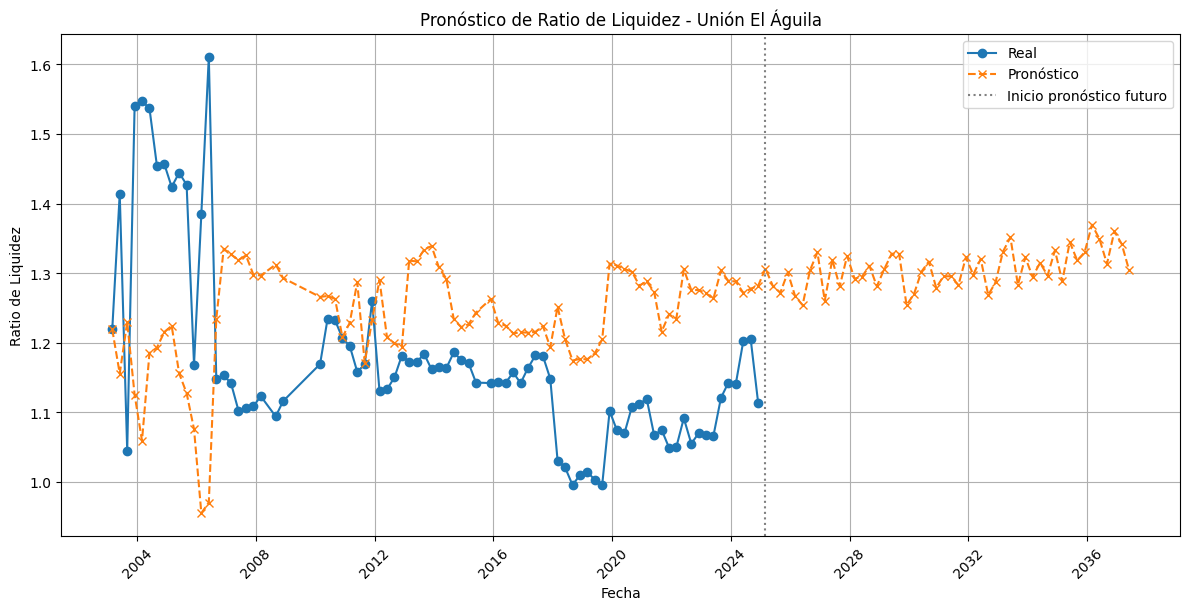


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===
MAE  (Error Absoluto Medio): 0.1615
MSE  (Error Cuadrático Medio): 0.0379
RMSE (Raíz del Error Cuadrático Medio): 0.1948


In [ ]:
#  Leer archivo de El Águila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Unión de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'wwwwwwwwwwwwwwwwwwwwwwwwwwwww': 'EL ÁGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluación del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")


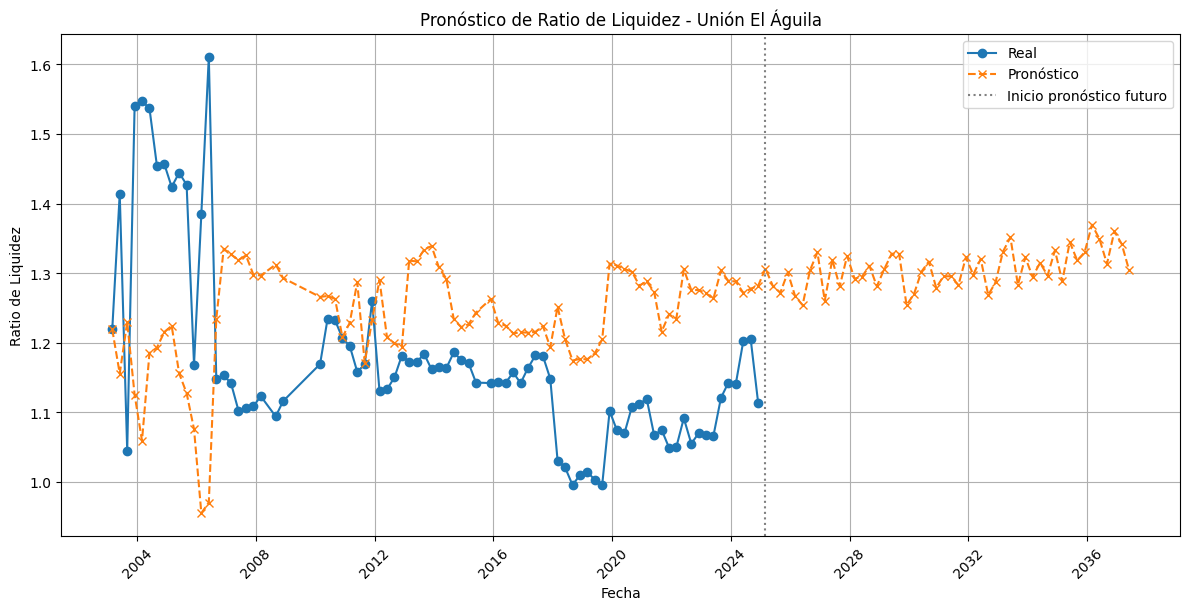


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===


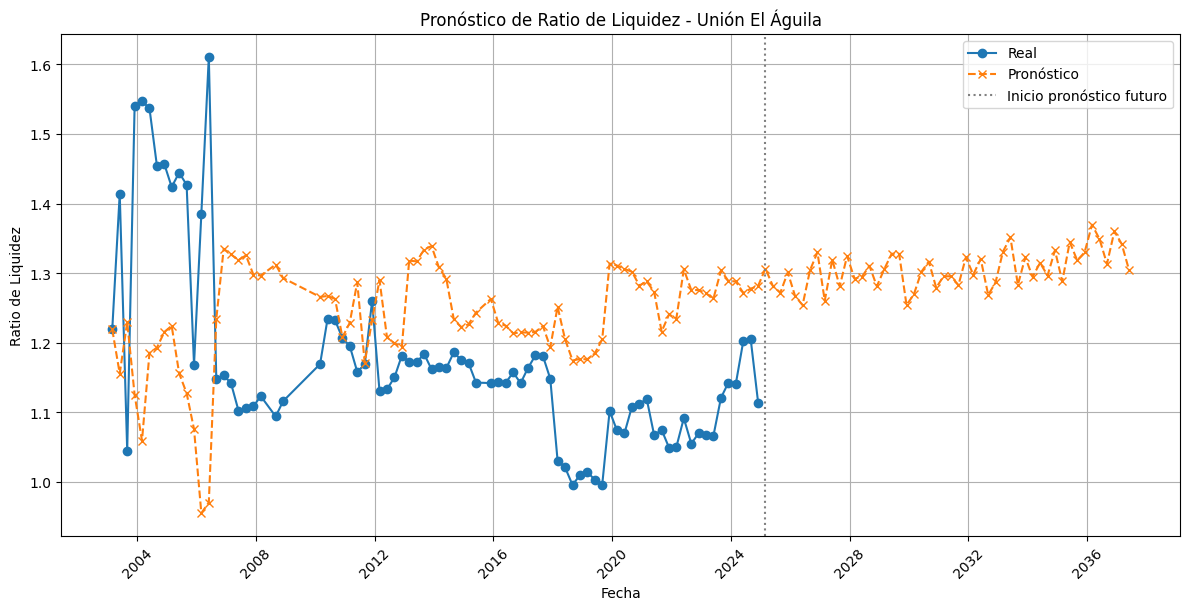


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===
MAE  (Error Absoluto Medio): 0.1615
MSE  (Error Cuadrático Medio): 0.0379
RMSE (Raíz del Error Cuadrático Medio): 0.1948


In [ ]:
#  Leer archivo de El Águila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Unión de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'wwwwwwwwwwwwwwwwwwwwwwwwwwwww': 'EL ÁGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluación del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
#  Leer archivo de El Águila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Unión de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Unión de Credito': 'EL ÁGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluación del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

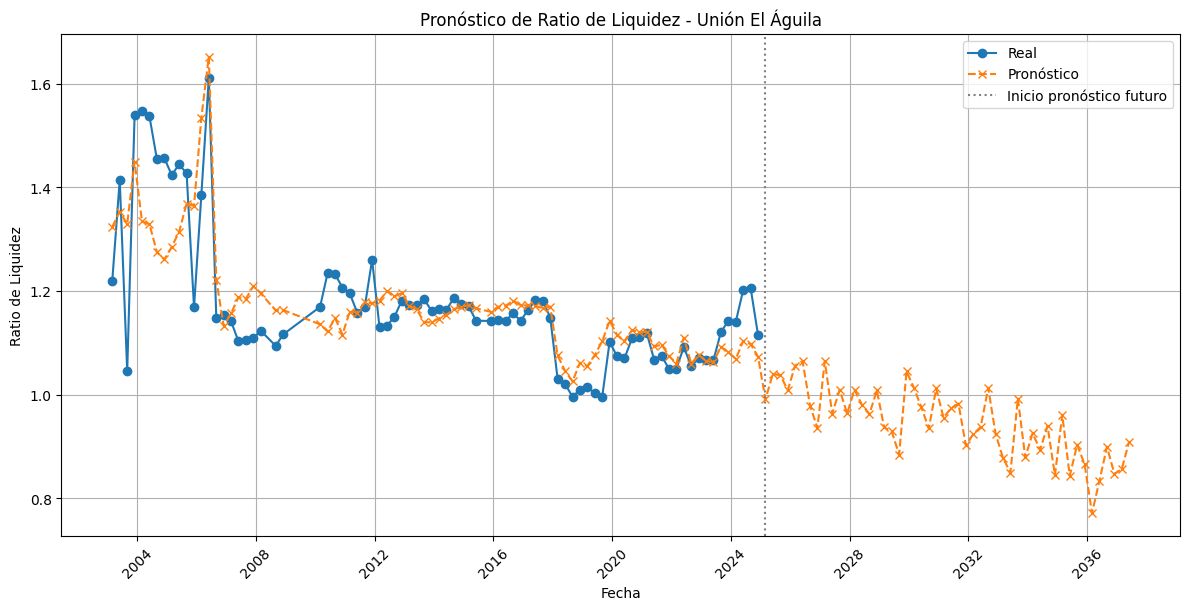


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===
MAE  (Error Absoluto Medio): 0.0562
MSE  (Error Cuadrático Medio): 0.0064
RMSE (Raíz del Error Cuadrático Medio): 0.0800

📈 Clasificación tipo semáforo basada en promedios de pronóstico futuro

🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)
RATIO DE LIQUIDEZ: 0.95 → 🔴 Alto
IMOR: 13.56 → 🟡 Medio
ICOR: 66.51 → 🟡 Medio
ROA: 8.18 → 🟢 Bajo
ROE: 20.11 → 🟢 Bajo


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Leer archivo de El Águila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Unión de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = sm.OLS(df_aguila['RATIO_LIQUIDEZ'], X_aguila).fit()
coeficientes = modelo.params
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Unión de Credito': 'EL ÁGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido
    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# Graficar con fechas reales
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluación del modelo
real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

# Clasificación tipo semáforo usando promedios de pronóstico futuro
print("\n📈 Clasificación tipo semáforo basada en promedios de pronóstico futuro")

# Cargar archivo de panel para cuartiles
df_panel = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df_panel.columns = df_panel.iloc[0]
df_panel = df_panel[1:]
df_panel.columns.name = None
df_panel = df_panel.rename(columns={"Unión de Credito": "INDICADOR"})

numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df_panel[col] = pd.to_numeric(df_panel[col], errors='coerce')

cuartiles = df_panel[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)
indicadores_invertidos = ["IMOR", "ICOR"]

def clasificar(valor, q1, q3, invertido=False):
    if invertido:
        if valor > q3:
            return "🔴 Alto"
        elif valor < q1:
            return "🟢 Bajo"
        else:
            return "🟡 Medio"
    else:
        if valor < q1:
            return "🔴 Alto"
        elif valor > q3:
            return "🟢 Bajo"
        else:
            return "🟡 Medio"

# Calcular promedio de los próximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(2)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

print("\n🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)")
for col in numeric_cols:
    valor = promedios_futuros[col]
    invertido = col in indicadores_invertidos
    estado = clasificar(valor, cuartiles.loc[0.25, col], cuartiles.loc[0.75, col], invertido)
    print(f"{col}: {valor} → {estado}")


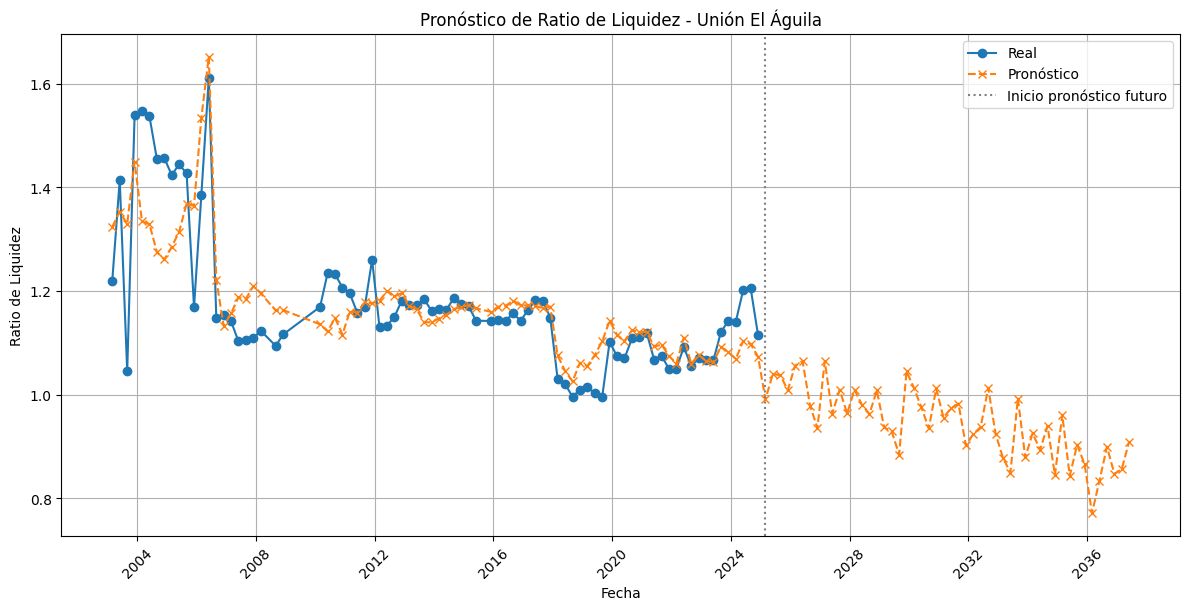

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/zmq/eventloop/zmqstream.py", line 557, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 120, in _handle_event
    event_f()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 742, in send
    to_send = self.serialize(msg, ident)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 630, in serialize
    content = self.pack(content)
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 82, in <lambda>
    json_packer = lambda obj: jsonapi.dumps(obj, default=date_default,
                              ^

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Leer archivo de El Águila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Unión de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = sm.OLS(df_aguila['RATIO_LIQUIDEZ'], X_aguila).fit()
coeficientes = modelo.params
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Unión de Credito': 'EL ÁGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido
    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# Graficar con fechas reales
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluación del modelo
real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

# Clasificación tipo semáforo con rangos definidos por la imagen
print("\n\ud83d\udcc8 Clasificación tipo semáforo basada en promedios de pronóstico futuro (según tabla de colores)")

# Calcular promedio de los próximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(4)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

def clasificar_color(indicador, valor):
    if indicador == 'ROA':
        if valor <= -0.0080:
            return '🔴 Alto'
        elif valor <= 0.0077:
            return '🟡 Medio'
        else:
            return '🟢 Bajo'
    elif indicador == 'ROE':
        if valor <= -0.0156:
            return '🔴 Alto'
        elif valor <= 0.0561:
            return '🟡 Medio'
        else:
            return '🟢 Bajo'
    elif indicador == 'IMOR':
        if valor <= 0.0104:
            return '🔴 Alto'
        elif valor <= 0.0114:
            return '🟡 Medio'
        else:
            return '🟢 Bajo'
    elif indicador == 'ICOR':
        if valor > 0.0465:
            return '🔴 Alto'
        elif valor > 0.0163:
            return '🟡 Medio'
        else:
            return '🟢 Bajo'
    elif indicador == 'RATIO DE LIQUIDEZ':
        if valor > 0.5573:
            return '🔴 Alto'
        elif valor > 0.2845:
            return '🟡 Medio'
        else:
            return '🟢 Bajo'
    else:
        return 'Sin clasificar'

print("\n🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)")
for indicador in ['ROA', 'ROE', 'IMOR', 'ICOR', 'RATIO DE LIQUIDEZ']:
    valor = promedios_futuros[indicador]
    estado = clasificar_color(indicador, valor)
    porcentaje = f"{valor*100:.2f}%"
    print(f"{indicador}: {porcentaje} → {estado}")


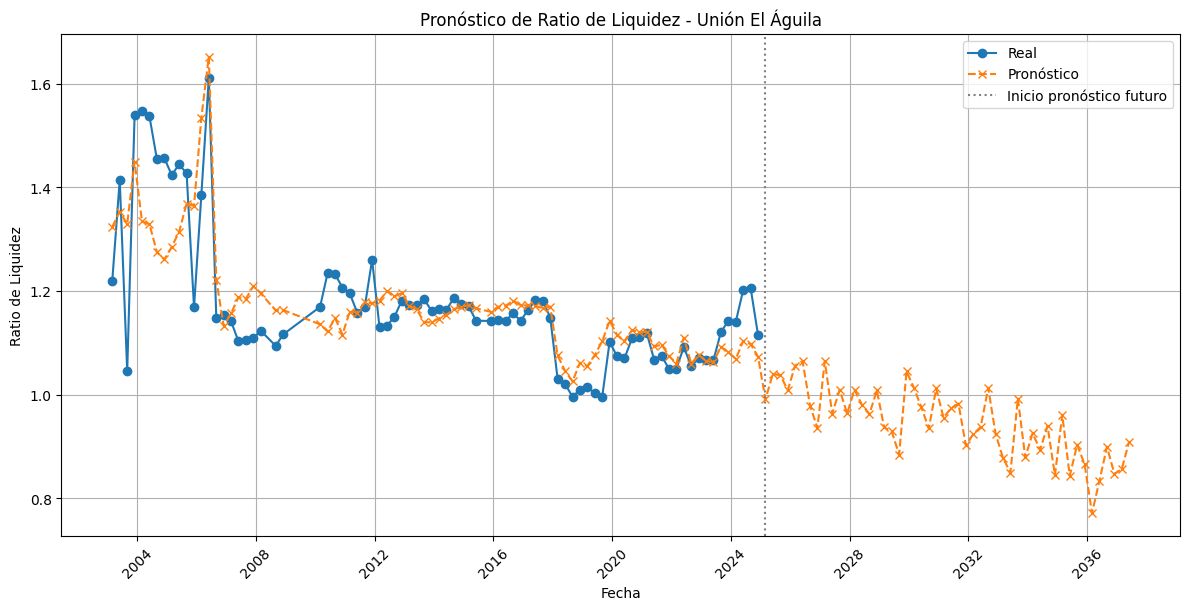


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===
MAE  (Error Absoluto Medio): 0.0562
MSE  (Error Cuadrático Medio): 0.0064
RMSE (Raíz del Error Cuadrático Medio): 0.0800

Clasificación tipo semáforo basada en promedios de pronóstico futuro

Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)
ROA: 817.78% → BAJO
ROE: 2010.65% → BAJO
IMOR: 1356.22% → BAJO
ICOR: 6650.67% → ALTO
RATIO DE LIQUIDEZ: 94.63% → ALTO


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Leer archivo de El Águila y pronosticar valores actuales
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Unión de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = sm.OLS(df_aguila['RATIO_LIQUIDEZ'], X_aguila).fit()
coeficientes = modelo.params
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Generar 50 periodos adicionales con más realismo
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Unión de Credito': 'EL ÁGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido
    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# Unir, convertir a fechas y exportar resultados
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# Graficar con fechas reales
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluación del modelo
real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

# Clasificación tipo semáforo con rangos definidos por la imagen (sin emojis)
print("\nClasificación tipo semáforo basada en promedios de pronóstico futuro")

# Calcular promedio de los próximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(4)
promedios_futuros = promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'})

def clasificar_color(indicador, valor):
    if indicador == 'ROA':
        if valor <= -0.0080:
            return 'ALTO'
        elif valor <= 0.0077:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'ROE':
        if valor <= -0.0156:
            return 'ALTO'
        elif valor <= 0.0561:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'IMOR':
        if valor <= 0.0104:
            return 'ALTO'
        elif valor <= 0.0114:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'ICOR':
        if valor > 0.0465:
            return 'ALTO'
        elif valor > 0.0163:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'RATIO DE LIQUIDEZ':
        if valor > 0.5573:
            return 'ALTO'
        elif valor > 0.2845:
            return 'MEDIO'
        else:
            return 'BAJO'
    else:
        return 'Sin clasificar'

print("\nUnión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)")
for indicador in ['ROA', 'ROE', 'IMOR', 'ICOR', 'RATIO DE LIQUIDEZ']:
    valor = promedios_futuros[indicador]
    porcentaje = f"{valor * 100:.2f}%"
    clasificacion = clasificar_color(indicador, valor)
    print(f"{indicador}: {porcentaje} → {clasificacion}")


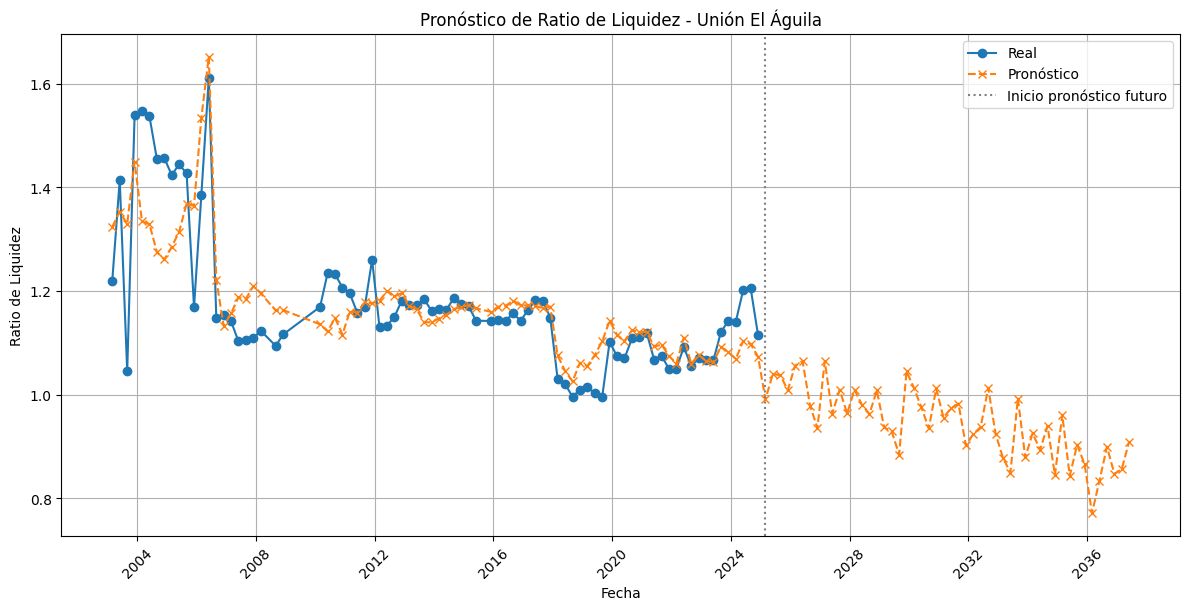


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===
MAE  (Error Absoluto Medio): 0.0562
MSE  (Error Cuadrático Medio): 0.0064
RMSE (Raíz del Error Cuadrático Medio): 0.0800


In [ ]:
#  Leer archivo de El Águila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'UNIONES': 'EL ÁGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluación del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from datetime import datetime
import matplotlib.dates as mdates

In [ ]:
# 1. Cargar y ajustar modelo panel
# ----------------------------
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()
coeficientes = resultados.params

print("\n=== RESUMEN DEL MODELO ===\n")
print(resultados.summary)


=== RESUMEN DEL MODELO ===

                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        19:23:10   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110

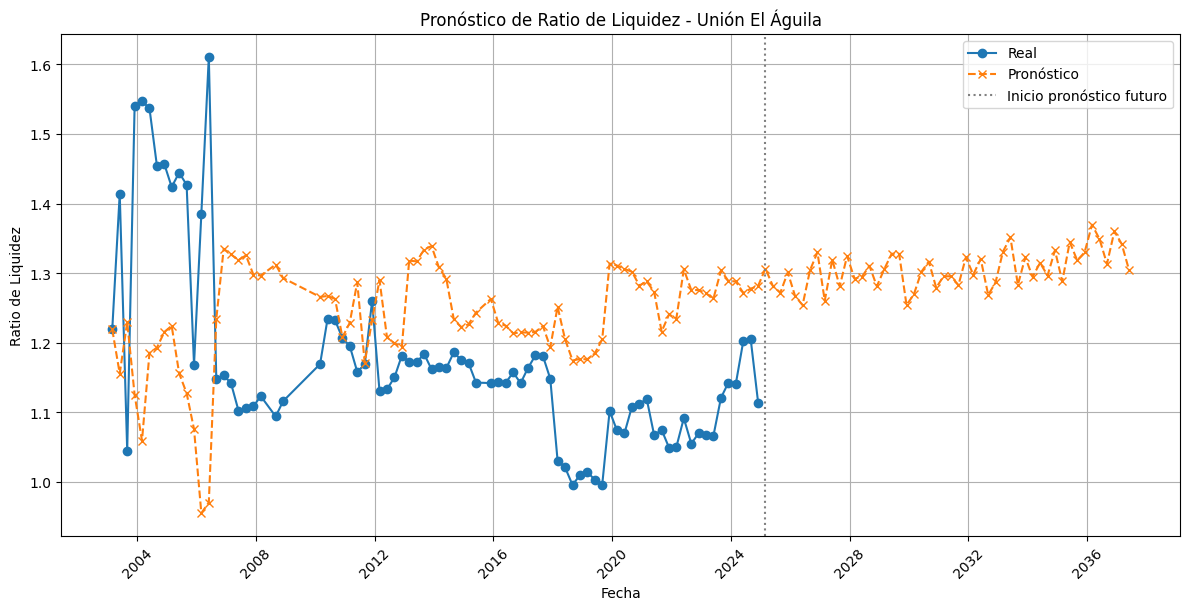


=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===
MAE  (Error Absoluto Medio): 0.1615
MSE  (Error Cuadrático Medio): 0.0379
RMSE (Raíz del Error Cuadrático Medio): 0.1948


In [ ]:
#  Leer archivo de El Águila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El Águila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con más realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{año}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    año = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        año += 1
    return año * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'UNIONES': 'EL ÁGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pronóstico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pronóstico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pronóstico de Ratio de Liquidez - Unión El Águila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluación del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRONÓSTICO (datos reales de El Águila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

In [ ]:
# Clasificación tipo semáforo usando promedios de pronóstico futuro
print("\n📈 Clasificación tipo semáforo basada en promedios de pronóstico futuro")

# Cargar archivo de panel para cuartiles
df_panel = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df_panel.columns = df_panel.iloc[0]
df_panel = df_panel[1:]
df_panel.columns.name = None
df_panel = df_panel.rename(columns={"Unión de Credito": "INDICADOR"})

numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df_panel[col] = pd.to_numeric(df_panel[col], errors='coerce')

cuartiles = df_panel[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)
indicadores_invertidos = ["IMOR", "ICOR"]

def clasificar(valor, q1, q3, invertido=False):
    if invertido:
        if valor > q3:
            return "🔴 Alto"
        elif valor < q1:
            return "🟢 Bajo"
        else:
            return "🟡 Medio"
    else:
        if valor < q1:
            return "🔴 Alto"
        elif valor > q3:
            return "🟢 Bajo"
        else:
            return "🟡 Medio"


# Calcular promedio de los próximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(2)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

print("\n🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)")
for col in numeric_cols:
    valor = promedios_futuros[col]
    invertido = col in indicadores_invertidos
    estado = clasificar(valor, cuartiles.loc[0.25, col], cuartiles.loc[0.75, col], invertido)
    print(f"{col}: {valor} → {estado}")


📈 Clasificación tipo semáforo basada en promedios de pronóstico futuro

🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)
RATIO DE LIQUIDEZ: 1.31 → 🟢 Bajo
IMOR: 13.56 → 🟡 Medio
ICOR: 66.51 → 🟡 Medio
ROA: 8.18 → 🟢 Bajo
ROE: 20.11 → 🟢 Bajo


In [ ]:
# Calcular los promedios futuros de los indicadores pronosticados
promedios = {
    'PRONOSTICO_': df['PRONOSTICO'].mean(),
    'IMOR': df['IMOR'].mean(),
    'ICOR': df['ICOR'].mean(),
    'ROA': df['ROA'].mean(),
    'ROE': df['ROE'].mean()
}

# Clasificar cada promedio con las funciones previamente definidas
clasificacion = {
    'PRONOSTICO': clasificar_liquidez(promedios['PRONOSTICO']),
    'IMOR': clasificar_imor(promedios['IMOR']),
    'ICOR': clasificar_icor(promedios['ICOR']),
    'ROA': clasificar_roa(promedios['ROA']),
    'ROE': clasificar_roe(promedios['ROE'])
}

# Asociar íconos según la clasificación
iconos = {'Alto': '🔴 Alto', 'Medio': '🟡 Medio', 'Bajo': '🟢 Bajo'}

# Construir el texto final
reporte = f"""📈 Clasificación tipo semáforo basada en promedios de pronóstico futuro

🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)
RATIO DE LIQUIDEZ: {promedios['PRONOSTICO']:.2f} → {iconos[clasificacion['PRONOSTICO']]}
IMOR: {promedios['IMOR']:.2f} → {iconos[clasificacion['IMOR']]}
ICOR: {promedios['ICOR']:.2f} → {iconos[clasificacion['ICOR']]}
ROA: {promedios['ROA']:.2f} → {iconos[clasificacion['ROA']]}
ROE: {promedios['ROE']:.2f} → {iconos[clasificacion['ROE']]}
"""

reporte


KeyError: 'PRONOSTICO'

In [ ]:
import pandas as pd

# Cargar archivo del panel (no se usa para cuartiles ahora, pero puede mantenerse si lo necesitas para otras cosas)
df_panel = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df_panel.columns = df_panel.iloc[0]
df_panel = df_panel[1:]
df_panel.columns.name = None
df_panel = df_panel.rename(columns={"Unión de Credito": "INDICADOR"})

# Asegurar que las columnas numéricas sean numéricas
numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df_panel[col] = pd.to_numeric(df_panel[col], errors='coerce')

# Suponiendo que df_futuro ya está cargado como tu archivo de pronóstico (como en pasos anteriores)

# Calcular promedios de los próximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(2)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

# Funciones de clasificación por rangos específicos de la imagen
def clasificar_roa(a):
    if a <= -0.0080:
        return '🔴 Alto'
    elif -0.0080 < a <= 0.0077:
        return '🟡 Medio'
    else:
        return '🟢 Bajo'

def clasificar_roe(b):
    if b <= -0.0156:
        return '🔴 Alto'
    elif -0.0156 < b <= 0.0561:
        return '🟡 Medio'
    else:
        return '🟢 Bajo'

def clasificar_liquidez(c):
    if c <= 1.04:
        return '🔴 Alto'
    elif 1.04 < c <= 1.14:
        return '🟡 Medio'
    else:
        return '🟢 Bajo'

def clasificar_imor(d):
    if d > 4.65:
        return '🔴 Alto'
    elif 1.63 < d <= 4.65:
        return '🟡 Medio'
    else:
        return '🟢 Bajo'

def clasificar_icor(e):
    if e > 55.73:
        return '🔴 Alto'
    elif 28.45 < e <= 55.73:
        return '🟡 Medio'
    else:
        return '🟢 Bajo'

# Imprimir clasificación tipo semáforo
print("\n📈 Clasificación tipo semáforo basada en promedios de pronóstico futuro")
print("\n🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)")

print(f"RATIO DE LIQUIDEZ: {promedios_futuros['RATIO DE LIQUIDEZ']} → {clasificar_liquidez(promedios_futuros['RATIO DE LIQUIDEZ'])}")
print(f"IMOR: {promedios_futuros['IMOR']} → {clasificar_imor(promedios_futuros['IMOR'])}")
print(f"ICOR: {promedios_futuros['ICOR']} → {clasificar_icor(promedios_futuros['ICOR'])}")
print(f"ROA: {promedios_futuros['ROA']} → {clasificar_roa(promedios_futuros['ROA'])}")
print(f"ROE: {promedios_futuros['ROE']} → {clasificar_roe(promedios_futuros['ROE'])}")



📈 Clasificación tipo semáforo basada en promedios de pronóstico futuro

🔹 Unión de Crédito: EL ÁGUILA (promedio de pronóstico futuro)
RATIO DE LIQUIDEZ: 1.31 → 🟢 Bajo
IMOR: 13.56 → 🔴 Alto
ICOR: 66.51 → 🔴 Alto
ROA: 8.18 → 🟢 Bajo
ROE: 20.11 → 🟢 Bajo
